In [80]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Comic Sans MS"
plt.rcParams["font.size"] = 20
plt.rcParams["font.family"] = "Fira Sans"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for conversion
ua_to_A = 0.529177       # Bohr radius to Angstrom conversion
ha_to_cm = 219474.63137  # Hartree to cm^-1 conversion

# Load data
R1, UX, UA = np.loadtxt("PEC/TableI.txt", usecols=[0,1,2], unpack=True)

# Apply conversions
R1 *= ua_to_A
UX *= ha_to_cm
offset = abs(np.min(UX))
UA = UA*ha_to_cm + offset
UX += offset

# Load second data set
R2, Ub = np.loadtxt("PEC/Table5.txt", usecols=[0,1], unpack=True)
R2 *= ua_to_A
Ub = Ub*ha_to_cm + offset

# Save the corrected potential curves
np.savetxt("X1Sigma_units.txt", np.column_stack((R1, UX)), fmt="%10.6f %15.6f", header="R(Angstrom) U(cm^-1)\nX1Sigma+ potential curve for NaRb")
np.savetxt("A1Sigma_units.txt", np.column_stack((R1, UA)), fmt="%10.6f %15.6f", header="R(Angstrom) U(cm^-1)\nA1Sigma+ potential curve for NaRb")
np.savetxt("b3pi0_units.txt", np.column_stack((R2, Ub)), fmt="%10.6f %15.6f", header="R(Angstrom) U(cm^-1)\nb3pi0 potential curve for NaRb")

print("Potential curves saved to X1Sigma+.txt, A1Sigma+.txt, and b3pi0.txt")

plt.figure(figsize=(10, 6))
plt.plot(R1, UA, label="A1Sigma+")
plt.plot(R1, UX, label="X1Sigma+")
plt.plot(R2, Ub, label="b3pi0")

plt.xlabel("R (Angstrom)")
plt.ylabel("V (cm$^{-1}$)")
plt.title("NaRb Potential Energy Curves")
plt.legend()
plt.tight_layout()
# plt.savefig("NaRb_PEC.png", dpi=300)
plt.show()

print("Plot saved as NaRb_PEC.png")

FileNotFoundError: PEC/TableI.txt not found.

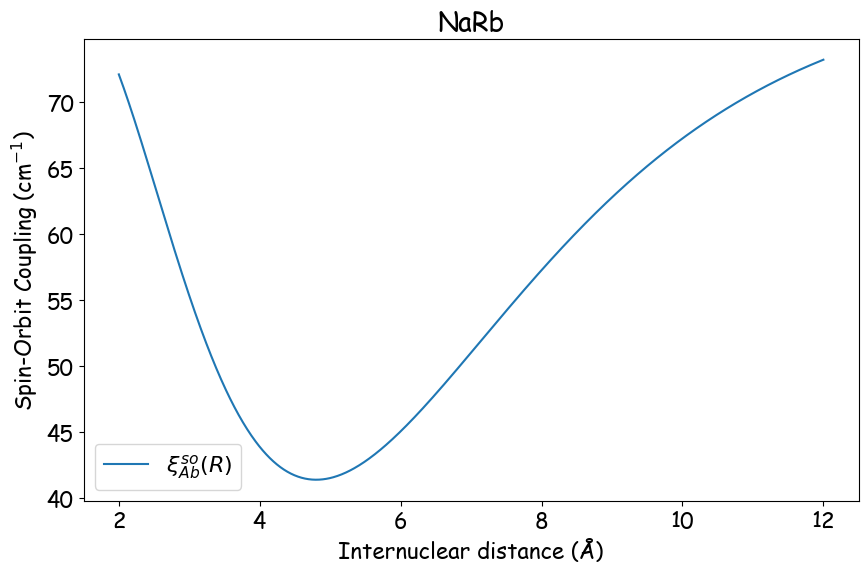

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the spin-orbit coupling function
xi_Rb_so = 79.2242  # cm^-1
D_so = 37.8445      # cm^-1
beta_so = 0.84969    # Å^-1
R_so = 4.80067       # Å

# Generate the range of internuclear distances
R = np.linspace(2, 12, 1000)  # from 2 Å to 12 Å

# Calculate the spin-orbit coupling function
H_SO = xi_Rb_so - D_so * np.exp(-beta_so * (R - R_so)**2 / (2 * R))

# Plot the spin-orbit coupling function
plt.figure(figsize=(10, 6))
plt.plot(R, H_SO, label=r'$\xi_{A b}^{s o}(R)$')
plt.xlabel('Internuclear distance (Å)')
plt.ylabel('Spin-Orbit Coupling (cm$^{-1}$)')
plt.title('NaRb')
plt.legend()
plt.show()


Grid range: 2.5 to 15.0
R range: 2.328379 to 15.87531


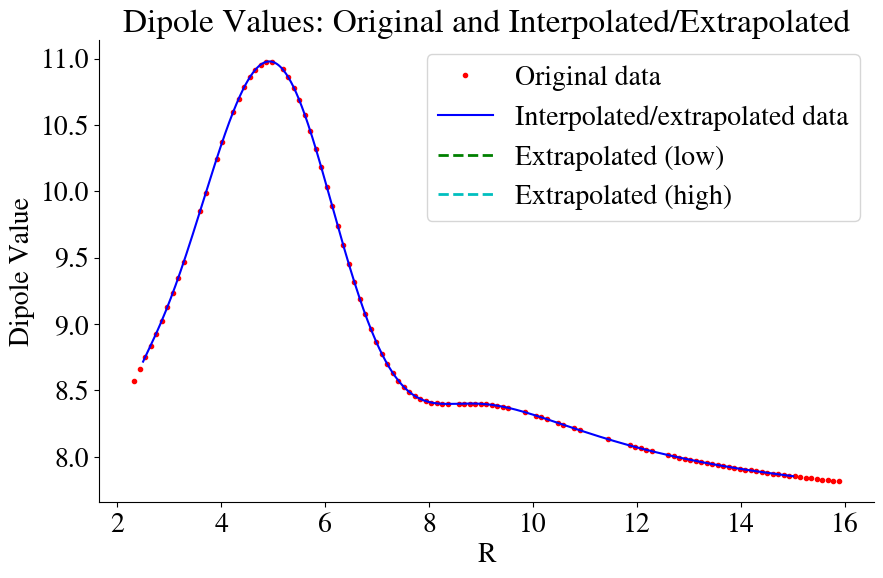

800 800


In [12]:
# Load your data
from scipy import interpolate

grid = np.loadtxt("R_grid.txt")
R, dip = np.loadtxt("DUO/PEC/dipole.txt", unpack=True)

# Check ranges
print(f"Grid range: {grid.min()} to {grid.max()}")  # 2.5 to 15
print(f"R range: {R.min()} to {R.max()}")          # 2.645 to 14.81

# Create interpolation function with extrapolation
# Use 'cubic' for smoother interpolation, and 'extrapolate' to handle out-of-range points
interp_func = interpolate.interp1d(R, dip, kind='cubic', fill_value='extrapolate')

# Apply interpolation to get dipole values at all grid points
new_dip = interp_func(grid)

# Plot to verify the result
plt.figure(figsize=(10, 6))
plt.plot(R, dip, 'ro', label='Original data', markersize=3)
plt.plot(grid, new_dip, 'b-', label='Interpolated/extrapolated data')

# Highlight the extrapolated regions
extrapolated_mask_low = grid < R.min()
extrapolated_mask_high = grid > R.max()
plt.plot(grid[extrapolated_mask_low], new_dip[extrapolated_mask_low], 'g--', linewidth=2, label='Extrapolated (low)')
plt.plot(grid[extrapolated_mask_high], new_dip[extrapolated_mask_high], 'c--', linewidth=2, label='Extrapolated (high)')

# plt.grid(True)
plt.legend()
plt.title("Dipole Values: Original and Interpolated/Extrapolated")
plt.xlabel("R")
plt.ylabel("Dipole Value")
# plt.savefig("interpolated_dipole.png")
plt.show()
print(len(grid), len(new_dip))
# Save the interpolated data
# np.savetxt("interpolated_dipole.txt", np.column_stack((grid, new_dip)))

Rdip 15.0 2.5
Dip 10.978471727998183 7.853834842370633
SO 77.23616275108276 41.379702835243116


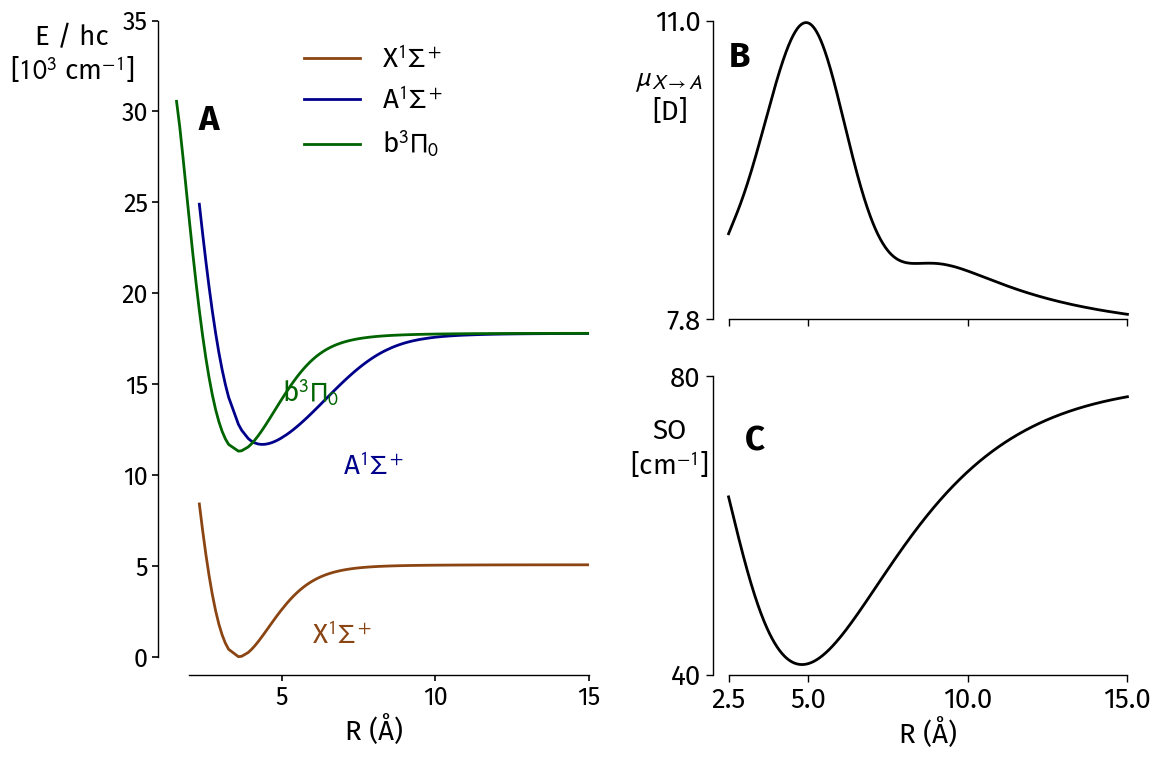

In [83]:
Ra, A = np.loadtxt("DUO/PEC/A1Sigma_units.txt", skiprows=1, unpack=True)
Rb, b = np.loadtxt("DUO/PEC/b3pi0_units.txt", skiprows=1, unpack=True)
RX, X = np.loadtxt("DUO/PEC/X1Sigma_units.txt", skiprows=1, unpack=True)

# Create figure and GridSpec
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 2)

# Create the large subplot that spans both rows on the left
ax = fig.add_subplot(gs[:, 0])  # Spans all rows, first column

# R, A, b = np.loadtxt("potentials/pot_grid", usecols=[0,1,2], unpack=True, skiprows=1)
ax.plot(RX, X*1e-3, lw=2, label=r"X$^1\Sigma^+$", color="saddlebrown")
ax.plot(Ra, A*1e-3, lw=2, label=r"A$^1\Sigma^+$", color="darkblue")
ax.plot(Rb, b*1e-3, lw=2, label=r"b$^3\Pi_0$", color="darkgreen")

ax.set_xlabel("R (Å)")
ax.set_ylabel("E / hc\n[$10^3$ cm$^{-1}$]", rotation=0)
ax.legend(frameon=False, loc="upper center")
ax.spines[["top", "right"]].set_visible(False)

ax.tick_params(
    axis='both', 
    direction='out',
    color='black',
    width=1.2,
    length=4,
    labelsize=18
)
ax.set_xlim(1,15)
ax.spines["bottom"].set_bounds(2,15)
ax.spines["left"].set_bounds(0,35)
# ax.set_yticks([0,5,10,20,30])
ax.set_ylim(-1,35)
ax.set_yticks([0,5,10,15,20,25,30,35])
ax.yaxis.set_label_coords(-0.2, 0.9)

ax.annotate(r"X${}^1\Sigma^+$",(6,0.7), color="saddlebrown")
ax.annotate(r"A${}^1\Sigma^+$",(7,10), color="darkblue")
ax.annotate(r"b${}^3\Pi_0$",(5,14), color="darkgreen")

# Create the top right subplot
ax_top_right = fig.add_subplot(gs[0, 1])    # First row, second column
Rdip, Dip = np.loadtxt("interpolated_dipole.txt", unpack=True)
ax_top_right.plot(Rdip, Dip, color="black", lw=2)
print("Rdip", np.max(Rdip), np.min(Rdip))
print("Dip", np.max(Dip), np.min(Dip))
ax_top_right.set_xlim(2,15.5)
ax_top_right.set_xticks([2.5,5,10,15])
ax_top_right.spines["bottom"].set_bounds(2.5,15)

ax_top_right.tick_params(axis='x', labelbottom=False)  # Hide x-tick labels

ax_top_right.spines["left"].set_bounds([7.8,11])
ax_top_right.set_ylim(7.8,11)
ax_top_right.set_yticks([7.8,11])
ax_top_right.set_ylabel(r"$\mu_{X \rightarrow A}$"+" \n[D]", rotation=0)
ax_top_right.yaxis.set_label_coords(-0.1, 0.65)
ax_top_right.spines["right"].set_visible(False)  # Hide right spine
ax_top_right.set_xlim(2,15.5)  # Match the x-limits
ax_top_right.spines["bottom"].set_bounds(2.5,15)
ax_top_right.set_xticks([2.5,5,10,15])
# Create the bottom right subplot with shared x-axis
ax_bottom_right = fig.add_subplot(gs[1, 1], sharex=ax_top_right)  # Share x-axis with top right
xi_Rb_so = 79.2242  # cm^-1
D_so = 37.8445      # cm^-1
beta_so = 0.84969    # Å^-1
R_so = 4.80067       # Å

# Generate the range of internuclear distances
R = Rdip  # from 2 Å to 12 Å

# Calculate the spin-orbit coupling function
H_SO = xi_Rb_so - D_so * np.exp(-beta_so * (R - R_so)**2 / (2 * R))
print("SO", np.max(H_SO), np.min(H_SO))

ax_bottom_right.plot(Rdip, H_SO, color="black", lw=2)

# Set the bounds and appearance for bottom right
ax_bottom_right.set_xlabel("R (Å)")  # Only need x-label on bottom plot
ax_bottom_right.spines["right"].set_visible(False)  # Hide right spine
ax_bottom_right.set_xlim(2,15.5)  # Match the x-limits
ax_bottom_right.spines["bottom"].set_bounds(2.5,15)

# Add y-axis settings for bottom right plot 
# (assuming you want similar styling as top right)
ax_bottom_right.set_ylabel("SO\n"+ "[cm${}^{-1}$]", rotation=0)
ax_bottom_right.yaxis.set_label_coords(-0.1, 0.65)
ax_bottom_right.spines["left"].set_bounds(40,80)
ax_bottom_right.set_ylim(40,80)
ax_bottom_right.set_yticks([40,80])

ax.annotate("A", (2.3, 29), weight="bold", fontsize=25)
ax_top_right.annotate("B", (2.5, 10.5), weight='bold', fontsize=25)
ax_bottom_right.annotate("C", (3, 70), weight='bold', fontsize=25)

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig("NaRb_PEC_coupling_sans.svg")

# Compute Gamma

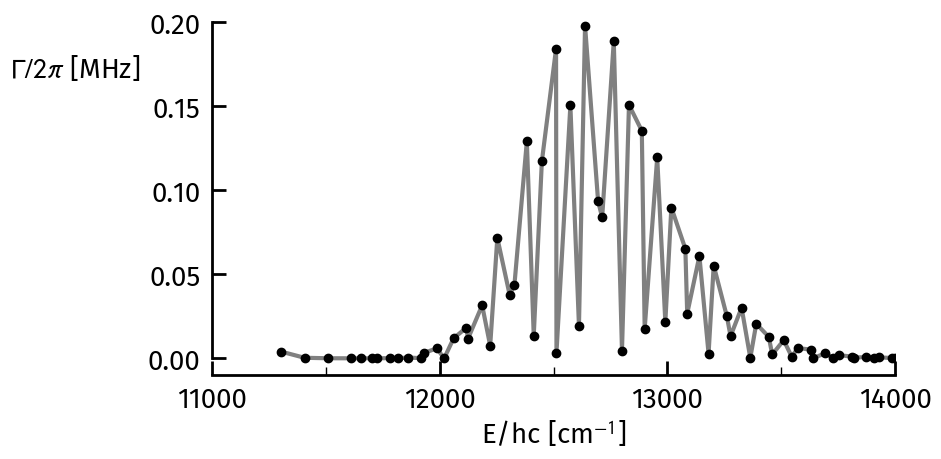

In [79]:
import scipy.constants as const
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'STIXGeneral'
# plt.rcParams['font.family'] = 'Comic Sans MS'

# plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size']= 20

def calculate_gamma(mu_n, omega_cm1, c0, c1):
    """
    Parameters:
    - mu_n: Computed integral (C1) (in Debye * Angstrom^2 ?)
    - omega_cm1: Transition energy (in cm^-1)
    - c0: Coefficient c0
    - c1: Coefficient c1

    Returns:
    - Gamma: Differential transition width (in Hz)
    """
    # Define physical constants
    epsilon_0 = const.epsilon_0  # Vacuum permittivity in F/m
    hbar = const.hbar           # Reduced Planck constant in J*s
    h = const.h
    c = const.c                 # Speed of light in m/s

    # Convert transition energy to Hz
    omega_J = omega_cm1*100 *h*c
    omega = omega_J/hbar
    # omega = omega*2*np.pi
    # Convert mu to C.m
    mu_coulomb_m = mu_n * 3.33564e-30

    # Compute the differential transition width Γ
    factor = (4 / 3) * (1 / (4 * np.pi * epsilon_0 * hbar * c**3))
    term = (np.abs(c0)**2 / 3) - (np.abs(c1)**2 / 6)
    # term = 1/3
    Gamma = factor * term * omega**3 * np.abs(mu_coulomb_m)**2

    return Gamma


data = np.loadtxt("nroot_100_vmax_300_energies.ener", usecols=[1,2], skiprows=1)
energies = data[:,1]

c0, c1 = 0.892, 0.452
# roots, I = np.loadtxt("integrals.int", unpack=True)
roots, I = np.loadtxt("integrals_without_R2.int", unpack=True)
grid = np.loadtxt("R_grid.txt")
h = grid[1]-grid[0]
I = I/(h)
Gamma = calculate_gamma(abs(I), energies, c0, c1)*1e-6


fac = 2*np.pi




fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(energies, Gamma/fac, marker="o", markeredgecolor="black", markerfacecolor="black", color="gray", lw=3)
# ax.set_ylim(0,7)
ax.set_xlim(11000,14000)
ax.set_xlabel('E/hc [cm$^{-1}$]')
ax.set_ylabel(r'$\Gamma/2\pi$ [MHz]', rotation=0)
# ax.set_title("NaRb - DUO")
# ax.grid(True, alpha=0.3)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2))  # Major ticks at 0, 2, 4, 6
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))  # Minor ticks at 1, 3, 5

ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))  # Major ticks at 0, 2, 4, 6
ax.xaxis.set_minor_locator(ticker.MultipleLocator(500))  # Major ticks at 0, 2, 4, 6

ax.tick_params(axis='both', which='major', direction='in', labelsize=20, length=10, width=2, pad=8)
ax.tick_params(axis='both', which='minor', direction='in', length=6, width=1, pad=2)

for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.spines["left"].set_bounds(0,0.2)


np.savetxt("Gamma.txt", np.column_stack((energies,  )), fmt="%.10e", header="R(A) \t Gamma (MHz)")
ax.yaxis.set_label_coords(-0.2, 0.8)
plt.tight_layout()
plt.savefig("NaRb_Gamma_sans.svg")
# plt.figure()
# print(np.max(Gamma/fac))

# plt.scatter(energies, Gamma/fac, s=12, marker="o")
# plt.plot(energies, Gamma/fac)
# plt.xlabel("Energy (cm-1)")
# plt.ylabel("Gamma/2pi")
# plt.title("NaRb")

# lifetime calculation

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict

def parse_duo_transitions(filename, emission=True):
    """
    Parses a DUO output file for transition data.
    Returns structured array with fields: 'ji', 'jf', 'ei', 'ef', 's_if', 'a_if', 'vi', 'vf'
    """
    try:
        # Read all lines at once
        lines = Path(filename).read_text().splitlines()
        
        # Find header line
        if emission:
            header_idx = next((i for i, line in enumerate(lines) 
                          if "J Gamma ->" in line and "S(i->f)" in line and "A(if)" in line), -1)
        else:
            header_idx = next((i for i, line in enumerate(lines) 
                if "J Gamma <-" in line and "S(f<-i)" in line and "A(if)" in line), -1)
            print(header_idx)
        if header_idx == -1:
            print(f"Header not found in {filename}")
            return np.array([])
            
        # Process data lines that follow header
        data_rows = []
        for line in lines[header_idx+1:]:
            if not line.strip():
                continue
                
            parts = line.split()
            if len(parts) < 12:
                break
                
            try:
                # Extract state info from the last part of the line
                state_info = line.split(')->(')

                if not emission:
                    state_info = line.split(')<-(')
                if len(state_info) == 2:
                    # Extract initial state info
                    initial_state = state_info[0].split('(')[1].strip()
                    initial_parts = initial_state.split()
                    vi = int(initial_parts[1])
                    si = int(initial_parts[0])
                    # Extract final state info
                    final_state = state_info[1].split(')')[0].strip()
                    final_parts = final_state.split()
                    vf = int(final_parts[1])
                    sf  = int(final_parts[0])
                    # [Ji, Jf, Ei, Ef, S(i->f), A(if), vi, vf]
                    data_rows.append([
                        float(parts[0]), float(parts[3]), 
                        float(parts[6]), float(parts[8]), 
                        float(parts[10]), float(parts[11]),
                        vi, vf, si, sf
                    ])
                else:
                    # If state info not found, skip this line
                    continue
            except (ValueError, IndexError) as e:
                print(f"Error parsing line: {e}")
                continue
        
        if not data_rows:
            return np.array([])
            
        # Convert to structured array
        result = np.zeros(len(data_rows), dtype=[
            ('ji', float), ('jf', float), ('ei', float), 
            ('ef', float), ('s_if', float), ('a_if', float),
            ('vi', int), ('vf', int), ('si', int), ('sf', int)
        ])
        
        # Fill fields
        data = np.array(data_rows)
        result['ji'] = data[:, 0]
        result['jf'] = data[:, 1]
        result['ei'] = data[:, 2]
        result['ef'] = data[:, 3]
        result['s_if'] = data[:, 4]  # Store S(i->f) directly
        result['a_if'] = data[:, 5]
        result['vi'] = data[:, 6]
        result['vf'] = data[:, 7]
        result['si'] = data[:, 8]
        result['sf'] = data[:, 9]

        
        print(f"Extracted {len(result)} transitions")
        return result
        
    except Exception as e:
        print(f"Error processing file: {e}")
        return np.array([])

def main(filename='out/test1.out'):
    # Parse transition data
    data = parse_duo_transitions(filename)

    if data.size > 0:
        # Show sample data
        print("\nSample data (first 3 rows):")
        for row in data[:3]:
            print(f"J: {row['ji']} → {row['jf']}, v: {row['vi']} → {row['vf']}, " 
                  f"S(i->f): {row['s_if']:.4e}, A(if): {row['a_if']:.4e}")
        
        # Basic statistics
        print("\nStats:")
        print(f"Avg S(i->f): {np.mean(data['s_if']):.4e}")
        print(f"Avg A(if): {np.mean(data['a_if']):.4e}")
        print(f"Max A(if): {np.max(data['a_if']):.4e}")
        return data
    else:
        print("No data extracted")
        return 0

Extracted 25405 transitions

Sample data (first 3 rows):
J: 1.0 → 0.0, v: 0 → 0, S(i->f): 2.4018e-01, A(if): 3.6269e+04
J: 1.0 → 0.0, v: 0 → 0, S(i->f): 4.5526e-04, A(if): 6.8806e+01
J: 1.0 → 0.0, v: 1 → 0, S(i->f): 1.9187e-02, A(if): 2.9772e+03

Stats:
Avg S(i->f): 4.5909e-01
Avg A(if): 1.1137e+05
Max A(if): 6.9666e+06
(25405,)


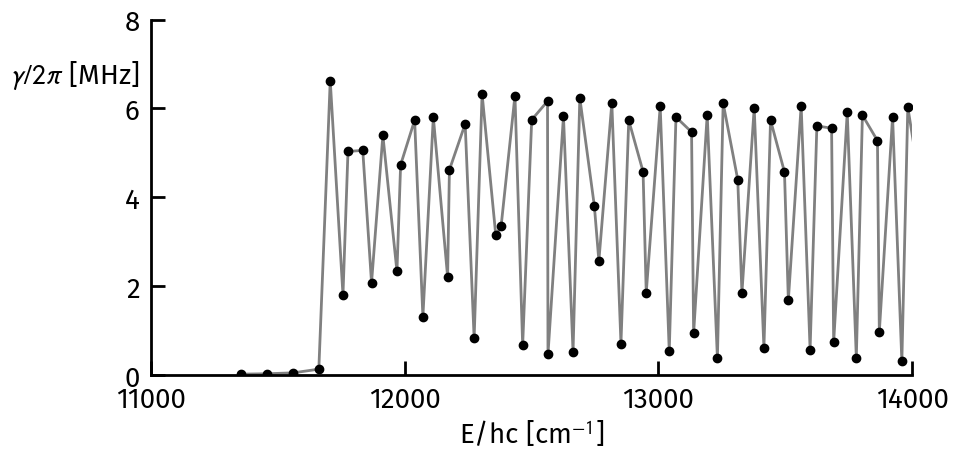

In [78]:
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# plt.rcParams['font.family'] = 'STIXGeneral'
# plt.rcParams['font.family'] = 'Comic Sans MS'

# plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size']= 20

data = main(filename="DUO/out/abs.out")
print(data.shape)
# Filter for J=0 states
J_mask = data["ji"] == 0
Ei = np.unique(data[J_mask]["ei"])
gamma = np.zeros(Ei.shape)
si_values = np.zeros(Ei.shape, dtype=int)

# For each unique energy level
for i in range(len(Ei)):
    mask = (data["ei"] == Ei[i]) & J_mask
    # Sum A coefficients for lifetime
    gamma[i] = np.sum(data["a_if"][mask])
    # Get si value (most common for this energy level)
    if np.any(mask):
        si_values[i] = np.argmax(np.bincount(data["si"][mask]))

# Convert to MHz
gamma *= 1e-6/(2*np.pi)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(Ei, gamma, marker="o", markeredgecolor="black", markerfacecolor="black", color="gray", lw=2)
ax.set_ylim(0,8)
ax.set_xlim(11000,14000)
ax.set_xlabel('E/hc [cm$^{-1}$]')
ax.set_ylabel(r'$\gamma/2\pi$ [MHz]', rotation=0)
# ax.set_title("NaRb - DUO")
# ax.grid(True, alpha=0.3)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))  # Major ticks at 0, 2, 4, 6
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))  # Minor ticks at 1, 3, 5

ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))  # Major ticks at 0, 2, 4, 6
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(500))  # Major ticks at 0, 2, 4, 6

ax.tick_params(axis='both', which='major', direction='in',  labelsize=20, length=10, width=2, pad=8)
# ax.tick_params(axis='both', which='minor', direction='in',  length=6, width=1, pad=2)

for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.yaxis.set_label_coords(-0.1, 0.8)

np.savetxt("lifetime.txt", np.column_stack((Ei, gamma)), fmt="%.10e", header="R(A) \t gamma (MHz)")
plt.tight_layout()
plt.savefig("NaRb_lifetime_sans.svg")
# Labels = ["X1Sigma+", "A1Sigma+", "b3pi0"]
# # Plot with colors by si value
# for si in np.unique(si_values):
#     mask = si_values == si
#     plt.scatter(Ei[mask], gamma[mask], label=f'{Labels[si-1]}')
#     plt.vlines(Ei[mask], 0, gamma[mask], alpha=0.3)

# plt.xlabel('Energy (cm$^{-1}$)')
# plt.ylabel(r'$\gamma/2\pi$ (MHz)')
# plt.title('A$^1\\Sigma^+$-b$^3\Pi$ States (J=0)')
# plt.grid(True, alpha=0.3)
# plt.legend()


94 correspondances trouvées avec une tolérance de 0.01.


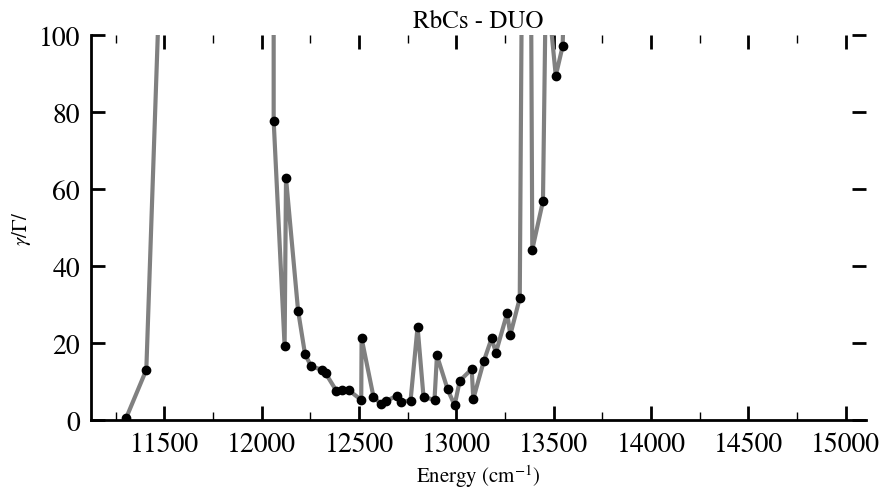

In [60]:
# Charger les données
Eg, g = np.loadtxt("lifetime.txt", skiprows=1, unpack=True)
EG, G = np.loadtxt("Gamma.txt", skiprows=1, unpack=True)
Eg = Eg-51.980348624113
# Tolérance d'appariement (en cm⁻¹)

tol = 1e-2
# Listes pour stocker les résultats
ratios = []
energies_matched = []
Eg_list = []
EG_list = []
g_list, G_list = [], []
# Appariement avec tolérance
for i, E1 in enumerate(Eg):
    matches = np.where(np.abs(EG - E1) < tol)[0]
    
    if len(matches) > 0:
        j = matches[np.argmin(np.abs(EG[matches] - E1))]
        ratio = g[i] / G[j]
        ratios.append(ratio)
        energies_matched.append((E1 + EG[j]) / 2)  # ou E1
        g_list.append(g[i])
        G_list.append(G[j])
        Eg_list.append(E1)
        EG_list.append(EG[j])

# Convertir en array
energies_matched = np.array(energies_matched)
ratios = np.array(ratios)
Eg_list = np.array(Eg_list)
EG_list = np.array(EG_list)
g_list, G_list = np.array(g_list), np.array(G_list)

# Sauvegarder dans un fichier texte
np.savetxt(
    "ratio_g_over_G.txt",
    np.column_stack((energies_matched, ratios, Eg_list, EG_list, g_list, G_list)),
    header="E_avg\tg/G\tEg\tEG\tgamma\tGamma",
    fmt="%.10e"
)

print(f"{len(ratios)} correspondances trouvées avec une tolérance de {tol}.")


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(energies_matched, ratios, marker="o", markeredgecolor="black", markerfacecolor="black", color="gray", lw=3, label="1000 grid points")


# ax.plot(X, Y, marker="o", markeredgecolor="green", markerfacecolor="green", color="lightgreen", lw=3, label="800 points", alpha=0.5)
# ax.set_ylim(0,7)
# ax.set_xlim(8300,11400)
ax.set_xlabel('Energy (cm$^{-1}$)')
ax.set_ylabel(r'$\gamma/\Gamma/$')
ax.set_title("RbCs - DUO")
# ax.legend()
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))  # Major ticks at 0, 2, 4, 6
ax.xaxis.set_minor_locator(ticker.MultipleLocator(250))  # Major ticks at 0, 2, 4, 6

ax.tick_params(axis='both', which='major', direction='in', top=True, right=True, labelsize=20, length=10, width=2, pad=8)
ax.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=6, width=1, pad=2)
ax.set_ylim(0,100)
for spine in ax.spines.values():
    spine.set_linewidth(2)


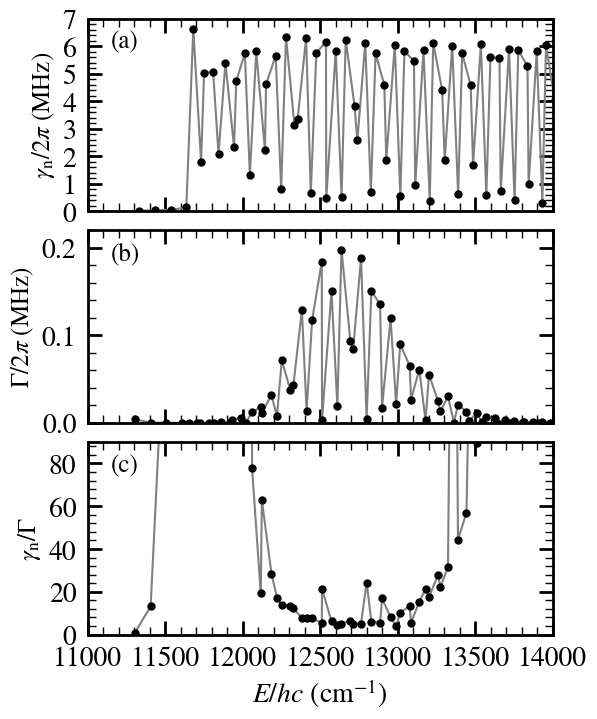

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Set STIX font and scientific style
plt.rcParams.update({
    'font.family': 'STIXGeneral',
    'mathtext.fontset': 'stix',
    'axes.linewidth': 1.0,
    'xtick.major.width': 1.0, 'ytick.major.width': 1.0,
    'xtick.minor.width': 0.8, 'ytick.minor.width': 0.8,
    'xtick.major.size': 5.0, 'ytick.major.size': 5.0,
    'xtick.minor.size': 3.0, 'ytick.minor.size': 3.0,
    'lines.linewidth': 1.0,
    'font.size': 15
})

# Load data
Eg, g = np.loadtxt("lifetime.txt", skiprows=1, unpack=True)
Eg = Eg - 24.794637558396
EG, G = np.loadtxt("Gamma.txt", skiprows=1, unpack=True)
E_matched, ratios = np.loadtxt("ratio_g_over_G.txt", skiprows=1, unpack=True, usecols=[0,1])



%matplotlib inline


# Create figure with equal-sized subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 8), sharex=True)
plt.subplots_adjust(hspace=0.1)

# Plot data and configure each subplot
ylims = [(0, 7), (0, 0.22), (0, 90)]
ylabels = [r'$\gamma_{\mathrm{n}}/2\pi$ (MHz)', r'$\Gamma/2\pi$ (MHz)', r'$\gamma_{\mathrm{n}}/\Gamma$']
data_sets = [(Eg, g), (EG, G/(2*np.pi)), (E_matched, ratios)]
labels = ['(a)', '(b)', '(c)']
y_major_locators = [1, 0.1, 20]  # Major tick intervals for each subplot

for i, (ax, (x_data, y_data), ylim, ylabel, label, y_major) in enumerate(
    zip(axs, data_sets, ylims, ylabels, labels, y_major_locators)):
    
    # Plot data points with connecting lines
    ax.plot(x_data, y_data,  marker="o", markeredgecolor="black", markerfacecolor="black", color="gray", lw=1.5, ms=5)    
    # Configure axis
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_ylim(ylim)
    ax.text(0.05, 0.85, label, transform=ax.transAxes, fontsize=18)
    
    # Set tick parameters with specific major/minor ticks
    ax.tick_params(which='both', direction='in', top=True, right=True)
    ax.yaxis.set_major_locator(MultipleLocator(y_major))
    ax.yaxis.set_minor_locator(MultipleLocator(y_major/5))  # 5 minor ticks between majors

# Set x-axis ticks and label
axs[0].set_xlim(11000, 14000)
for ax in axs:
    ax.spines[["top", "right"]].set_visible(True)
    ax.xaxis.set_major_locator(MultipleLocator(500))
    ax.xaxis.set_minor_locator(MultipleLocator(100))
    ax.tick_params(axis='both', which='major', direction='in', top=True, right=True, labelsize=20, length=10, width=2, pad=8)
    ax.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=6, width=1, pad=2)

    for spine in ax.spines.values():
        spine.set_linewidth(2)


# Only bottom plot gets x-label
axs[2].set_xlabel(r'$E/hc$ (cm$^{-1}$)', fontsize=20)
# plt.tight_layout()
plt.savefig('spectroscopy_plot.svg', dpi=300, bbox_inches='tight')
plt.show()